In [ ]:
# "D:/Pose/Neuro Code/data/NoveltySessInfoMatFiles/Achilles_10252013_sessInfo.mat"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
# with h5py.File('/home/dz2336/Desktop/Research/Project/hdp/data/real/Achilles_10252013_eeg_theta_1.mat','r') as f:
#     tlfp = (f['TLFP'][()]);
#     tph = f['Tph'][()];

In [2]:
with h5py.File('D:/Pose/Neuro Code/data/NoveltySessInfoMatFiles/Achilles_10252013_sessInfo.mat', 'r') as f:
    print(f['sessInfo'].keys())
    print('epoch', f['sessInfo']['Epochs'].keys())
    print('position', f['sessInfo']['Position'].keys())
    print('spikes', f['sessInfo']['Spikes'].keys())

    ## load spike info
    spikes_times = np.array(f['sessInfo']['Spikes']['SpikeTimes'])[0];
    spikes_cells = np.array(f['sessInfo']['Spikes']['SpikeIDs'])[0];
    pyr_cells = np.array(f['sessInfo']['Spikes']['PyrIDs'])[0];
    print(spikes_times.shape)    
    print(spikes_cells.shape)    
    print(pyr_cells.shape)    
    # print(pyr_cells)    

    # ## load location info ## all in maze
    locations_2d = np.array(f['sessInfo']['Position']['TwoDLocation']).T;
    locations = np.array(f['sessInfo']['Position']['OneDLocation'])[0];
    locations_times = np.array(f['sessInfo']['Position']['TimeStamps'])[:,0];
    # linspeed_raw = np.array(f['sessInfo']['Position']['linspeed_raw'])[0];
    # linspeed_sm = np.array(f['sessInfo']['Position']['linspeed_sm'])[0];
    
    print(locations_2d.shape)
    print(locations.shape)
    print(locations_times.shape)
    # print(linspeed_raw.shape)
    # print(linspeed_sm.shape)


    # ## load maze epoch range
    maze_epoch = np.array(f['sessInfo']['Epochs']['MazeEpoch'])[:,0];
    wake_epoch = np.array(f['sessInfo']['Epochs']['Wake']);
    print(maze_epoch)
    print(wake_epoch)

<KeysViewHDF5 ['Epochs', 'Position', 'Spikes']>
epoch <KeysViewHDF5 ['Drowsy', 'Intermediate', 'MazeEpoch', 'NREM', 'POSTEpoch', 'PREEpoch', 'REM', 'Wake', 'sessDuration']>
position <KeysViewHDF5 ['MazeType', 'OneDLocation', 'TimeStamps', 'TwoDLocation']>
spikes <KeysViewHDF5 ['IntIDs', 'PyrIDs', 'SpikeIDs', 'SpikeTimes']>
(8414607,)
(8414607,)
(120,)
(80762, 2)
(80762,)
(80762,)
[18079.5 20147. ]
[[  409.  1724.  2047.  2926.  7987. 12277. 18077. 19690. 20469. 22775.
  23411. 23977. 24429. 24692. 26648. 26989. 27339. 28540. 30571. 31487.]
 [  604.  1825.  2275.  3115.  8021. 12787. 19607. 20415. 20627. 23325.
  23567. 24188. 24588. 24895. 26928. 27007. 27451. 28640. 30753. 31544.]]


In [3]:
time_in_maze = ((spikes_times >= maze_epoch[0])*(spikes_times <= maze_epoch[1]));
print(time_in_maze.shape)

spikes_times = spikes_times[time_in_maze];
spikes_cells = spikes_cells[time_in_maze];

cell_mask = np.isin(spikes_cells, pyr_cells);
spikes_times = spikes_times[cell_mask];
spikes_cells = spikes_cells[cell_mask];
print(spikes_times.shape)
print(spikes_cells.shape)

(8414607,)
(270829,)
(270829,)


In [4]:
spikes_times[111], spikes_cells[111], spikes_times[112], spikes_cells[112]

(18080.4612, 619.0, 18080.46195, 1039.0)

In [5]:
bin_size = 25; ## change bin size to whatever you want here

binned_spike_times = np.array(np.floor(spikes_times*1000/bin_size), dtype='int');
spike_by_neuron = np.zeros((binned_spike_times.max() - binned_spike_times.min()+1, pyr_cells.shape[0]));
binned_spike_times.shape, spike_by_neuron.shape, 

((270829,), (82700, 120))

In [6]:
binned_spike_times[111], spikes_cells[111], binned_spike_times[112], spikes_cells[112]

(723218, 619.0, 723218, 1039.0)

In [7]:

cell_dic = {};
for i,v in enumerate(pyr_cells):
    cell_dic[int(v)] = i;
cell_dic

{102: 0,
 107: 1,
 108: 2,
 110: 3,
 112: 4,
 113: 5,
 114: 6,
 117: 7,
 122: 8,
 123: 9,
 124: 10,
 128: 11,
 129: 12,
 130: 13,
 205: 14,
 305: 15,
 403: 16,
 405: 17,
 412: 18,
 413: 19,
 414: 20,
 415: 21,
 416: 22,
 417: 23,
 418: 24,
 419: 25,
 420: 26,
 421: 27,
 422: 28,
 510: 29,
 514: 30,
 516: 31,
 518: 32,
 519: 33,
 522: 34,
 524: 35,
 526: 36,
 527: 37,
 529: 38,
 530: 39,
 532: 40,
 533: 41,
 534: 42,
 535: 43,
 536: 44,
 538: 45,
 603: 46,
 605: 47,
 611: 48,
 612: 49,
 613: 50,
 614: 51,
 615: 52,
 616: 53,
 618: 54,
 619: 55,
 620: 56,
 802: 57,
 803: 58,
 805: 59,
 807: 60,
 808: 61,
 811: 62,
 819: 63,
 825: 64,
 826: 65,
 827: 66,
 828: 67,
 829: 68,
 830: 69,
 903: 70,
 913: 71,
 915: 72,
 921: 73,
 923: 74,
 924: 75,
 925: 76,
 927: 77,
 928: 78,
 929: 79,
 931: 80,
 932: 81,
 933: 82,
 934: 83,
 935: 84,
 1004: 85,
 1019: 86,
 1020: 87,
 1021: 88,
 1022: 89,
 1028: 90,
 1029: 91,
 1033: 92,
 1034: 93,
 1035: 94,
 1037: 95,
 1038: 96,
 1039: 97,
 1040: 98,
 1102:

In [8]:
for it in range(binned_spike_times.shape[0]):
    spike_by_neuron[binned_spike_times[it]-binned_spike_times.min(), cell_dic[spikes_cells[it]]] += 1;
    

In [9]:
spike_by_neuron.shape

(82700, 120)

In [ ]:

tph_binned_time = np.array(np.floor((np.arange(binned_spike_times.min(),binned_spike_times.max()+1)*bin_size/1000)*1250), dtype='int');
tph_vec = tph[0][tph_binned_time]
tlpf_vec = tlfp[0][tph_binned_time]


In [10]:
binned_locations_times = np.array(np.floor(locations_times*1000/bin_size), dtype='int');
binned_locations_times.shape

(80762,)

In [11]:
locations.shape, locations[0]

((80762,), nan)

In [12]:
non_na = ~np.isnan(locations)
np.array(~np.isnan(locations)).sum(), np.array(np.isnan(locations)).sum()

(10336, 70426)

In [13]:
binned_locations_times = binned_locations_times[non_na];
locations = locations[non_na];
#locations_2d = locations_2d[non_na];

In [ ]:
non_na = (~np.isnan(linspeed_raw));
binned_locations_times = binned_locations_times[non_na];
locations = locations[non_na];
linspeed_raw = linspeed_raw[non_na];
linspeed_sm = linspeed_sm[non_na];
#locations_2d = locations_2d[non_na];

In [14]:
locations.shape, locations_times.shape

((10336,), (80762,))

In [15]:
locations_vec = np.zeros(spike_by_neuron.shape[0])+np.nan;
linspeed_vec = np.zeros(spike_by_neuron.shape[0])+np.nan;
locations_vec.shape, linspeed_vec.shape

((82700,), (82700,))

In [16]:
for it in range(len(binned_locations_times)):
    locations_vec[binned_locations_times[it] - binned_spike_times.min()] = locations[it];
    # linspeed_vec[binned_locations_times[it] - binned_spike_times.min()] = linspeed_raw[it];
    

In [17]:
locations_vec.shape

(82700,)

In [18]:
spike_by_neuron_use = spike_by_neuron[~np.isnan(locations_vec)];
locations_vec = locations_vec[~np.isnan(locations_vec)];
# tph_vec = tph_vec[~np.isnan(linspeed_vec)]
# tlpf_vec = tlpf_vec[~np.isnan(linspeed_vec)]
# linspeed_vec = linspeed_vec[~np.isnan(linspeed_vec)];


def rolling_max(x):
    idx_split = [];
    
    for idx, val in enumerate(x):
        if val < 0.025 or val > 1.575:
            tmp = x[max(idx-20,0):min(idx+20,len(x))];
            if val == min(tmp) or val==max(tmp):
                idx_split.append(idx)
    idx_split = np.array(idx_split)
    return idx_split

idx_split = rolling_max(locations_vec)
idx_split = np.delete(idx_split, np.where(np.abs(np.diff(locations_vec[idx_split])) < 1)[0])


# ## save data
# sio.savemat("../data/achilles_data/Achilles_data.mat",
#             {'trial':idx_split, 'spikes':spike_by_neuron_use, 'loc':locations_vec, 'lfp':tlpf_vec})

In [22]:
spike_by_neuron_use.shape, locations_vec.shape, locations_vec[111]

((10336, 120), (10336,), 0.5385954805936742)

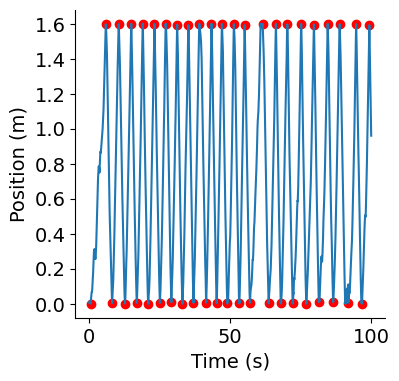

In [19]:

from matplotlib.ticker import FormatStrFormatter
## check if you have removed all the stop stages

fig = plt.figure(figsize=(4,4))
ax1 = plt.subplot(111);
fsz = 14;
ll = 4000
plt.plot(locations_vec[:ll])
ax1.set_xlabel('Time (s)',fontsize=fsz,fontweight='normal');
ax1.set_ylabel('Position (m)',fontsize=fsz,fontweight='normal');
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.setp(ax1.get_xticklabels(), fontsize=fsz);
plt.setp(ax1.get_yticklabels(), fontsize=fsz);
ax1.set_xticks((0,2000,4000,6000));
ax1.set_xticklabels((0,50,100,150));
#ax1.set_xticks((0,2000,4000,6000,8000,10000))
#ax1.set_xticklabels((0,50,100,150,200,250))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.scatter(idx_split[idx_split<ll], locations_vec[idx_split[idx_split<ll]], c='red')

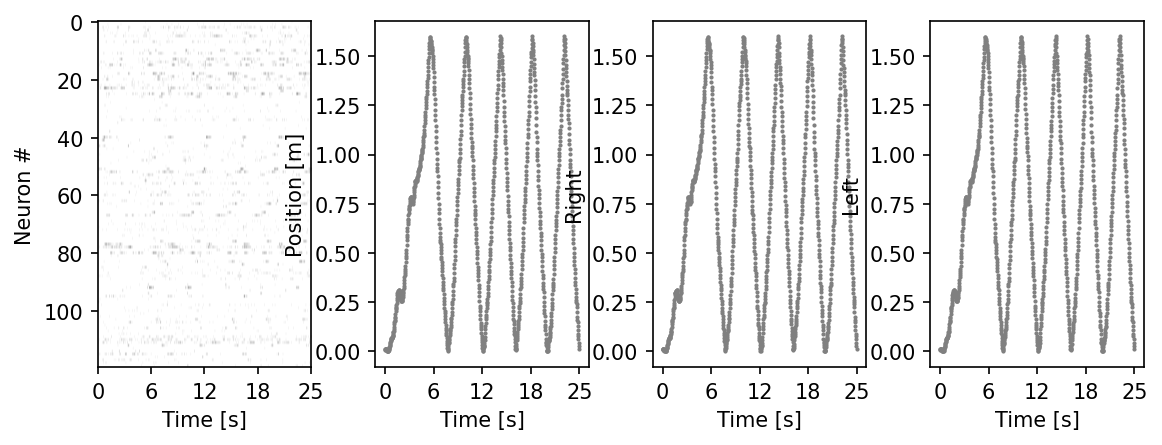

In [23]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(9,3), dpi=150)
plt.subplots_adjust(wspace = 0.3)
ax = plt.subplot(141)
ax.imshow(spike_by_neuron_use[:1000].T, aspect = 'auto', cmap = 'gray_r')
plt.ylabel('Neuron #')
plt.xlabel('Time [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))

ax2 = plt.subplot(142)
ax2.scatter(np.arange(1000), locations_vec[:1000], c = 'gray', s=1)
plt.ylabel('Position [m]')
plt.xlabel('Time [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))

ax2 = plt.subplot(143)
ax2.scatter(np.arange(1000), locations_vec[:1000], c = 'gray', s=1)
plt.ylabel('Right')
plt.xlabel('Time [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))

ax2 = plt.subplot(144)
ax2.scatter(np.arange(1000), locations_vec[:1000], c = 'gray', s=1)
plt.ylabel('Left')
plt.xlabel('Time [s]')
plt.xticks(np.linspace(0, 1000, 5), np.linspace(0, 0.025*1000, 5, dtype = int))

plt.show()

# plt.savefig('raw_data.png')
# plt.clf()


In [ ]:
# Dont bin the data
# store as event based
# show the data like the BOKEH page
# Convert to POYO shit 
